In [ ]:
#!pip install qiskit
#!pip install pylatexenc
#!pip install qiskit-aer

In [ ]:
from typing import List, Optional
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

#Superdense Coding

El *superdense coding* es el protocolo dual de teletransportación cuántica, mediante el cual se transmiten dos bits clásicos de información utilizando solo un qubit y un estado entrelazado previamente compartido. Fue ideado por Charles Bennett (IBM) y Stephen Wiesner en 1992.

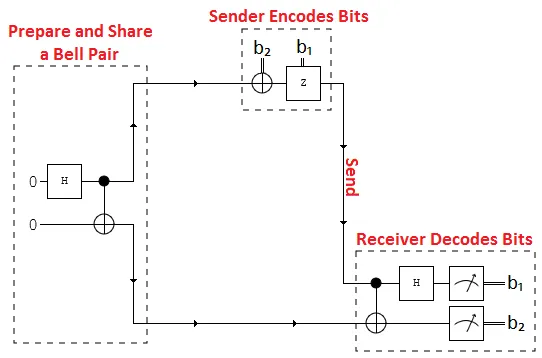



Como se ilustra arriba, y como en la teletransportación cuántica, el protocolo comienza con un estado entrelazado compartido entre el emisor (Alice) y el receptor (Bob):
$$|\psi\rangle=\frac{1}{\sqrt{2}}(|0\rangle_A\otimes|0\rangle_B+|1\rangle_A\otimes|1\rangle_B)$$

El primer qubit, denotado por el subíndice *A*, pertenece a Alice, y el segundo qubit, *B*, pertenece a Bob.

Alice quiere enviar un mensaje de dos bits a Bob, 00, 01, 10 u 11. Alice realiza una única operación de qubit en su qubit que transforma el estado entrelazado según el mensaje que quiera enviar:

- Para el mensaje **00**, Alice aplica la identidad, $\hat I$. El estado resultante es
$$|\beta_{00}\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle).$$

- Para el mensaje **01**, Alice aplica el operador *NOT*, $\hat X$. El estado resultante es
$$|\beta_{01}\rangle=\frac{1}{\sqrt{2}}(|10\rangle+|01\rangle).$$

- Para el mensaje **10**, Alice aplica el operador $\hat Z$. El estado resultante es
$$|\beta_{10}\rangle=\frac{1}{\sqrt{2}}(|00\rangle-|11\rangle).$$

- Para el mensaje **11**, Alice aplica el operador $\hat X\hat Z$. El estado resultante es
$$|\beta_{11}\rangle=\frac{1}{\sqrt{2}}(-|10\rangle+|01\rangle).$$

In [ ]:
# Creamos los registros clásicos cuánticos a emplear

qr = QuantumRegister(2)
cr = ClassicalRegister(4)  # los registros clásicos cr[2] y cr[3]
                           # serán usados para elegir la cadena a enviar

In [ ]:
# Creamos el circuito de superdense coding

qc = QuantumCircuit(qr, cr)

In [ ]:
# Supongamos que Alice desea enviar '11'
# Modifique para enviar alguna otra cadena

qc.x(1)
qc.x(1)

qc.measure(0,2)
qc.measure(1,3)

In [ ]:
# Reinicializamos los qubits

qc.reset(0)
qc.reset(1)

qc.barrier()

## Ejercicio 1:

Inicialice los qubits en el estado $$|\beta_{00}\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle).$$

In [ ]:
# Genere el estado \beta_{00}

## Ejercicio 2:

Alice debe decidir qué *string* enviará. Complete el código para decidir la cadena y aplicar las operaciones necesarias, según el protocolo.

In [ ]:
# Aplicamos las operaciones correspondientes,
# dependiendo del string que Alice vaya a enviar
# Hint: puede usar with qc.if_test((registro clásico, valor)):

## Ejercicio 3:

Finalmente, Bob debe medir los qubits en la base de Bell. Escriba el código correspondiente

In [ ]:
# Necesitamos añadir la parte del circuito que cambia de base y
# las operaciones de medición de los qubits


El circuito completo se ve así:

In [ ]:
qc.draw(output='mpl')

Finalmente, simulamos el protocolo.

In [ ]:
counts = backend.run(qc, shots=1000).result().get_counts()
plot_histogram(counts)